# 导入数据 (42953行, 4列)

(42953, 4)


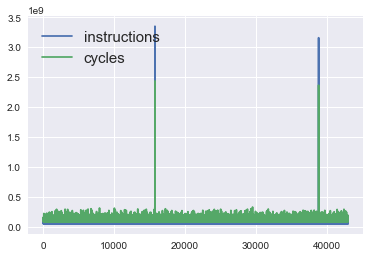

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

original_data =np.genfromtxt('/Users/dong/Desktop/data_analysis/dataset_3.csv',delimiter=",")
print(original_data.shape)

plt.plot(original_data[:,3], label="instructions")
plt.plot(original_data[:,2], label="cycles")
plt.legend(prop={'size':15})
plt.show()

# 截取前15736行 （闲时，无异常数据）

In [16]:
data = original_data[:15736]

print(data.shape)

(15736, 4)


# 计算闲时 CPI = Cycles/Instructions

(15736,)


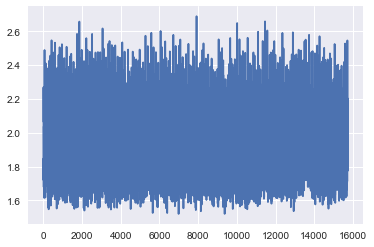

In [24]:
CPI = data[:, 2]/data[:, 3]

print(CPI.shape)

plt.plot(CPI)
plt.show()

# 闲时 CPI 分布图

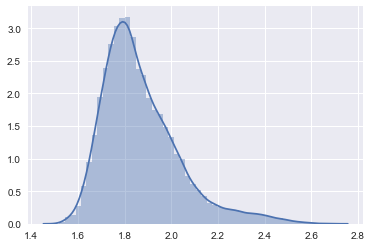

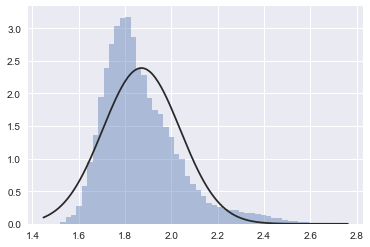

In [19]:
sns.distplot(CPI)
plt.show()

from scipy import stats
sns.distplot(CPI, kde=False, fit=stats.norm)
plt.show()

# CPI 异常时刻 分析

In [28]:
original_CPI = original_data[:,2]/original_data[:,3]

print(original_CPI.shape)

original_CPI_max = original_CPI.max() # CPI of all 43953 rows

CPI__max = CPI.max()  # CPI of first 15736 rows

print(original_CPI_max)
print(CPI_max)

print(original_CPI[15736:15745])  # outlier 1
print(original_CPI[38832:38841])  # outlier 2

(42953,)
2.68872218585
2.68872218585
[ 2.44699983  1.9775157   2.02290026  0.74126414  0.72711253  0.78888646
  1.97854025  1.97592875  1.93548988]
[ 1.97309026  1.9548918   2.0320438   1.25601035  0.7550591   0.71681632
  1.9722171   1.88610536  2.13833285]


##  这时候可以看出来 两个“异常”“尖峰”时刻的 CPI 并不是很高／最高。因为 instructions 数目和Cycles 同时在上涨。这里和 ”原分析“ 不同。